In [280]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.regression.linear_model import OLS

In [308]:
df = pd.read_csv('data/rides_weather_df.csv')
df['log_price'] = np.log(df.price)
df['sqrt_price'] = np.sqrt(df.price)
df['log_dist'] = np.log(df.distance)
df['sqrt_dist'] = np.sqrt(df.distance)
df['base_price'] = df.price / df.surge_multiplier
df= df[(df.base_price < 30) & 
       (df.base_price > 8) & 
       (df.distance > 1.25) & 
       (df.cab_type_Uber == 1) &
       (df.name_UberPool == 0) &
       (df.name_UberX == 0) &
       (df.name_WAV == 0) &
       (df.time_since_start > 0)]
df['log_tss'] = np.log(df.time_since_start)
df['sqrt_tss'] = np.sqrt(df.time_since_start)

In [306]:
df.time_since_start[:5]

24    1727967.460
25     121235.734
28    1614261.800
34     435131.336
36     535930.526
Name: time_since_start, dtype: float64

In [309]:
X = df.drop(['price', 'date_time_rides', 'Unnamed: 0','log_price', 'sqrt_price', 'base_price'], axis=1)
X = sm.add_constant(X)
y = df.base_price

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)
model1 = OLS(y_train, X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             base_price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     7794.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:16:10   Log-Likelihood:            -1.6488e+05
No. Observations:               78850   AIC:                         3.299e+05
Df Residuals:                   78791   BIC:                         3.304e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
distance                               -9.4706      0.462    -20.490      0.000     -10.377      -8.565
surge_multiplier                      -17.5075      1.154    -15.167      0.000     -19.770     -15.245
time_since_start                     2.044e-07   1.53e-07      1.335      0.182   -9.57e-08    5.05e-07
temp                                    0.0007      0.002      0.424      0.671      -0.003       0.004
clouds                                 -0.0525      0.031     -1.710      0.087      -0.113       0.008
pressure                                0.0004      0.001      0.417      0.677      -0.001       0.002
rain                                   -0.0165      0.308     -0.054      0.957      -0.621       0.587
humidity                               -0.0430      0.100     -0.431      0.666      -0.238       0.152
wind                                    0.0036      0.003      1.069      0.285      -0.003       0.010
cab_type_Lyft                        1.607e-13   7.81e-15     20.575      0.000    1.45e-13    1.76e-13
cab_type_Uber                         -17.5075      1.154    -15.167      0.000     -19.770     -15.245
destination_Back Bay                   -1.6021      0.094    -16.988      0.000      -1.787      -1.417
destination_Beacon Hill                -2.0993      0.095    -22.117      0.000      -2.285      -1.913
destination_Boston University          -1.6175      0.099    -16.360      0.000      -1.811      -1.424
destination_Fenway                     -2.0285      0.101    -20.088      0.000      -2.226      -1.831
destination_Financial District         -0.9323      0.116     -8.039      0.000      -1.160      -0.705
destination_Haymarket Square           -0.9148      0.100     -9.109      0.000      -1.112      -0.718
destination_North End                  -1.0113      0.099    -10.208      0.000      -1.206      -0.817
destination_North Station              -1.2146      0.101    -12.007      0.000      -1.413      -1.016
destination_Northeastern University    -1.2311      0.097    -12.660      0.000      -1.422      -1.041
destination_South Station              -2.0588      0.095    -21.772      0.000      -2.244      -1.873
destination_Theatre District           -1.2592      0.098    -12.862      0.000      -1.451      -1.067
destination_West End                   -1.5381      0.098    -15.716      0.000      -1.730      -1.346
source_Back Bay                        -1.6290      0.099    -16.431      0.000      -1.823      -1.435
source_Beacon Hill                     -2.0425      0.094    -21.645      0.000      -2.227      -1.858
source_Boston University               -1.7927      0.102    -17.646      0.000      -1.992      -1.594
source_Fenway                          -1.8826      0.098    -19.11

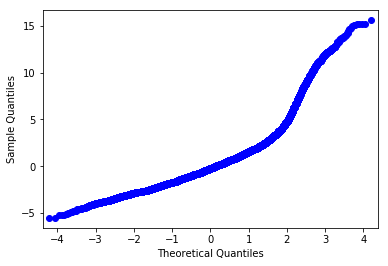

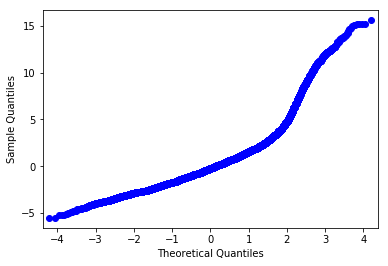

In [311]:
res = model1.resid
sm.qqplot(res)

In [312]:
X_train, X_test, y_train2, y_test2 = train_test_split(X, np.log(y), test_size=0.2, random_state=42)
model2 = OLS(y_train2, X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             base_price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     7428.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:16:29   Log-Likelihood:                 69981.
No. Observations:               78850   AIC:                        -1.398e+05
Df Residuals:                   78791   BIC:                        -1.393e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
distance                               -0.4621      0.024    -19.653      0.000      -0.508      -0.416
surge_multiplier                       -0.0406      0.059     -0.692      0.489      -0.156       0.074
time_since_start                     1.065e-08   7.79e-09      1.368      0.171   -4.62e-09    2.59e-08
temp                                  9.63e-06   8.42e-05      0.114      0.909      -0.000       0.000
clouds                                 -0.0030      0.002     -1.950      0.051      -0.006    1.49e-05
pressure                             1.724e-05   4.88e-05      0.353      0.724   -7.85e-05       0.000
rain                                    0.0013      0.016      0.085      0.933      -0.029       0.032
humidity                             9.937e-05      0.005      0.020      0.984      -0.010       0.010
wind                                    0.0002      0.000      1.025      0.305      -0.000       0.001
cab_type_Lyft                        6.574e-15   3.97e-16     16.553      0.000     5.8e-15    7.35e-15
cab_type_Uber                          -0.0406      0.059     -0.692      0.489      -0.156       0.074
destination_Back Bay                   -0.0124      0.005     -2.584      0.010      -0.022      -0.003
destination_Beacon Hill                -0.0352      0.005     -7.289      0.000      -0.045      -0.026
destination_Boston University          -0.0108      0.005     -2.145      0.032      -0.021      -0.001
destination_Fenway                     -0.0328      0.005     -6.381      0.000      -0.043      -0.023
destination_Financial District          0.0181      0.006      3.060      0.002       0.006       0.030
destination_Haymarket Square            0.0236      0.005      4.616      0.000       0.014       0.034
destination_North End                   0.0180      0.005      3.563      0.000       0.008       0.028
destination_North Station               0.0104      0.005      2.024      0.043       0.000       0.020
destination_Northeastern University     0.0090      0.005      1.814      0.070      -0.001       0.019
destination_South Station              -0.0356      0.005     -7.401      0.000      -0.045      -0.026
destination_Theatre District            0.0108      0.005      2.175      0.030       0.001       0.021
destination_West End                   -0.0037      0.005     -0.735      0.462      -0.013       0.006
source_Back Bay                        -0.0104      0.005     -2.064      0.039      -0.020      -0.001
source_Beacon Hill                     -0.0322      0.005     -6.708      0.000      -0.042      -0.023
source_Boston University               -0.0191      0.005     -3.696      0.000      -0.029      -0.009
source_Fenway                          -0.0254      0.005     -5.06

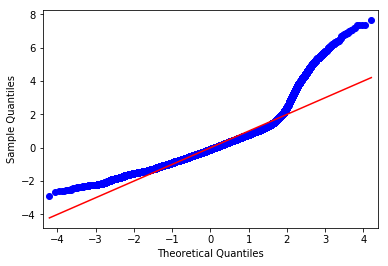

<Figure size 432x288 with 0 Axes>

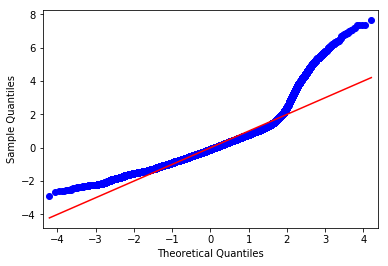

In [288]:
res = model2.resid
fig = plt.figure()
sm.qqplot(res/np.std(res), line='s')

(array([2.3000e+01, 5.7100e+02, 4.2420e+03, 1.0908e+04, 1.7979e+04,
        1.8402e+04, 1.4433e+04, 7.3550e+03, 2.2180e+03, 9.3500e+02,
        4.1500e+02, 3.3900e+02, 3.0400e+02, 2.5500e+02, 1.7800e+02,
        1.4600e+02, 8.1000e+01, 4.2000e+01, 1.7000e+01, 7.0000e+00]),
 array([-2.88537914, -2.35837648, -1.83137383, -1.30437117, -0.77736851,
        -0.25036586,  0.2766368 ,  0.80363946,  1.33064212,  1.85764477,
         2.38464743,  2.91165009,  3.43865275,  3.9656554 ,  4.49265806,
         5.01966072,  5.54666337,  6.07366603,  6.60066869,  7.12767135,
         7.654674  ]),
 <a list of 20 Patch objects>)

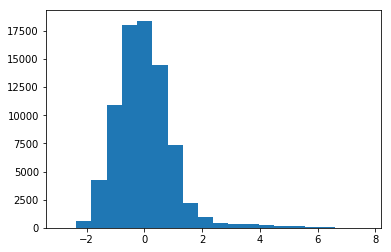

In [289]:
plt.hist(res/np.std(res), bins=20)

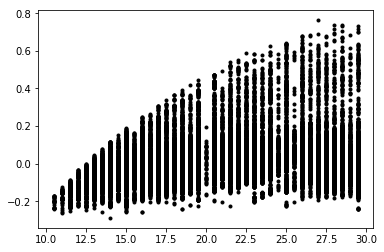

In [290]:
plt.plot(y_train[:100000], res[:100000], 'k.')

In [291]:
np.sum(X_train.loc[res[res > 0.8].index, :])

distance                               0.0
surge_multiplier                       0.0
time_since_start                       0.0
temp                                   0.0
clouds                                 0.0
pressure                               0.0
rain                                   0.0
humidity                               0.0
wind                                   0.0
cab_type_Lyft                          0.0
cab_type_Uber                          0.0
destination_Back Bay                   0.0
destination_Beacon Hill                0.0
destination_Boston University          0.0
destination_Fenway                     0.0
destination_Financial District         0.0
destination_Haymarket Square           0.0
destination_North End                  0.0
destination_North Station              0.0
destination_Northeastern University    0.0
destination_South Station              0.0
destination_Theatre District           0.0
destination_West End                   0.0
source_Back

In [292]:
res[res > 0.7].index

Int64Index([335172, 275191, 349790, 370084, 557124, 385868, 420218, 538760,
            20408],
           dtype='int64')

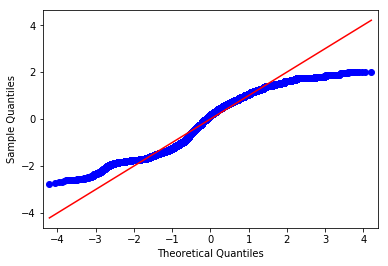

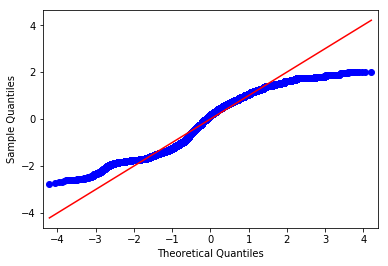

In [294]:
lasso = Lasso()
lasso.fit(X_train, y_train)
preds = lasso.predict(X_train)
lasso_res = preds - y_train
sm.qqplot(lasso_res/np.std(lasso_res), line='s')

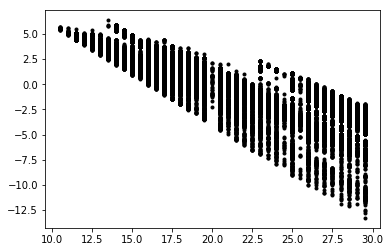

In [313]:
plt.plot(y_train, lasso_res, 'k.')

In [295]:
lasso.coef_

array([ 6.02777246e-01,  0.00000000e+00,  3.48041746e-08,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.26635285e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.18060655e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

/Users/anthonyschams/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.77704e-17): result may not be accurate.
  overwrite_a=True).T


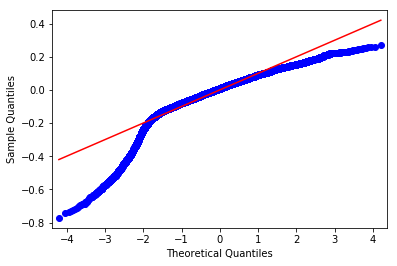

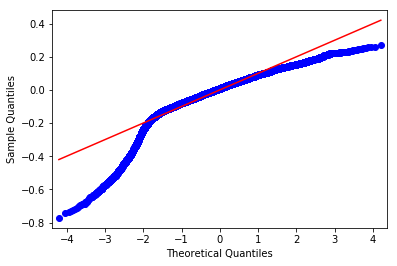

In [296]:
ridge = Ridge()
ridge.fit(X_train, y_train2)
preds = ridge.predict(X_train)
ridge_res = preds - y_train2
sm.qqplot(ridge_res, line='s')


In [297]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)


/Users/anthonyschams/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/anthonyschams/anaconda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [298]:
X_ss[:5]

array([[ 0.08111284,  0.        ,  1.28763337,  0.21728986, -0.37806294,
         1.07542185, -0.21365585, -0.29144015, -0.10119265,  0.        ,
         0.        , -0.3669012 , -0.33781896, -0.33806122, -0.34673482,
        -0.19668779, -0.25128433, -0.26626046, -0.26761261, -0.30944013,
         3.36985136, -0.33176603, -0.27832013, -0.32375568,  2.6611246 ,
        -0.32513093, -0.33936397, -0.18154955, -0.1707736 , -0.25962243,
        -0.27785433, -0.34651447, -0.33080426, -0.3398471 , -0.29100391,
        -0.80852573, -0.48657232,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.19152565,  0.        , -0.19264541, -0.20016771, -0.1919362 ,
        -0.19233363, -0.20923414, -0.21363341, -0.21503163, -0.21334767,
        -0.21435935, -0.21352954, -0.21531554, -0.21588242, -0.21175729,
        -0.21652513, -0.19904102, -0.20375929, -0.20639169, -0.21107641,
        -0.21984234, -0.21996911, -0.20413709, -0.2

In [299]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_ss, y, test_size=0.2, random_state=42)
model3 = OLS(y_train3, X_train3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             base_price   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     73.57
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:12:49   Log-Likelihood:            -3.5081e+05
No. Observations:               78850   AIC:                         7.017e+05
Df Residuals:                   78794   BIC:                         7.022e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -8.7752      4.328     -2.028      0.043     -17.257      -0.293
const       5.935e-14   2.88e-14      2.061      0.039    2.92e-15    1.16e-13
x2             0.0343      0.103      0.334      0.738      -0.167       0.236
x3            -0.0356      0.109     -0.327      0.744      -0.249       0.178
x4            -0.0760      0.101     -0.752      0.452      -0.274       0.122
x5            -0.0587      0.133     -0.440      0.660      -0.320       0.203
x6            -0.0081      0.087     -0.093      0.926      -0.179       0.163
x7             0.0875      0.128      0.682      0.495      -0.164       0.339
x8            -0.0579      0.120     -0.484      0.628      -0.293       0.177
x9          3.542e-14   1.73e-14      2.049      0.041    1.53e-15    6.93e-14
x10        -5.122e-13   2.49e-13     -2.055      0.040      -1e-12   -2.38e-14
x11            0.0129      0.067      0.193      0.847      -0.119       0.144
x12           -0.1474      0.066     -2.243      0.025      -0.276      -0.019
x13           -0.0183      0.064     -0.286      0.775      -0.144       0.107
x14           -0.1624      0.064     -2.518      0.012      -0.289      -0.036
x15            0.0504      0.092      0.547      0.584      -0.130       0.231
x16            0.1359      0.072      1.899      0.058      -0.004       0.276
x17            0.1645      0.069      2.370      0.018       0.028       0.301
x18            0.0480      0.070      0.685      0.493      -0.089       0.185
x19            0.0867      0.067      1.290      0.197      -0.045       0.218
x20           -0.1537      0.071     -2.177      0.029      -0.292      -0.015
x21            0.0779      0.067      1.165      0.244      -0.053       0.209
x22           -0.0159      0.068     -0.233      0.816      -0.150       0.118
x23            0.0160      0.068      0.236      0.813      -0.117       0.148
x24           -0.1192      0.065     -1.832      0.067      -0.247       0.008
x25           -0.0823      0.066     -1.241      0.215      -0.212       0.048
x26           -0.1008      0.064     -1.570      0.117      -0.227       0.025
x27            0.1747      0.089      1.960      0.050   -1.02e-05       0.349
x28            0.1869      0.073      2.543      0.011       0.043       0.331
x29            0.2952      0.071      4.187      0.000       0.157       0.433
x30            0.0588      0.070      0.836      0.403      -0.079       0.197
x31           -0.1785      0.064     -2.804      0.005      -0.303      -0.054
x32            0.0252      0.066      0.381      0.703      -0.105       0.155
x33           -0.0258      0.070     -0.370      0.711      -0.162       0.111
x34           -0.0137      0.069     -0.198      0.843      -0.149       0.122
x35           -0.0859      0.047     -1.831      0.067      -0.178       0.006
x3

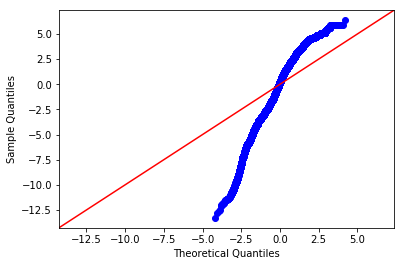

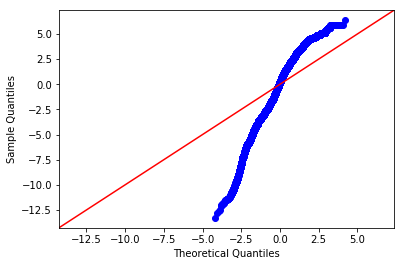

In [300]:
lasso2 = Lasso()
lasso2.fit(X_train3, y_train3)
preds = lasso2.predict(X_train3)
lasso_res = preds - y_train3
sm.qqplot(lasso_res, line='45')

In [301]:
df2 = pd.read_csv('data/rides_data2.csv')
df2['log_price'] = np.log(df.price)
df2['sqrt_price'] = np.sqrt(df.price)
df2['log_dist'] = np.log(df.distance)
df2['sqrt_dist'] = np.sqrt(df.distance)
df2['base_price'] = df.price / df.surge_multiplier

In [302]:
formula = ('base_price ~ source + destination + distance * C(name)')
           

In [303]:
model4 = smf.ols(formula=formula,
                 data=df2).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             base_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7946
Date:                Mon, 29 Jul 2019   Prob (F-statistic):              0.833
Time:                        18:12:59   Log-Likelihood:            -3.0008e+05
No. Observations:               98563   AIC:                         6.003e+05
Df Residuals:                   98518   BIC:                         6.007e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 18.9530      0.113    167.086      0.000      18.731      19.175
source[T.Beacon Hill]                     -0.0297      0.080     -0.373      0.709      -0.186       0.126
source[T.Boston University]                1.6392      0.069     23.760      0.000       1.504       1.774
source[T.Fenway]                           1.5715      0.067     23.368      0.000       1.440       1.703
source[T.Financial District]              -0.0484      0.080     -0.603      0.547      -0.206       0.109
source[T.Haymarket Square]                 1.5198      0.067     22.626      0.000       1.388       1.651
source[T.North End]                        1.5617      0.065     23.860      0.000       1.433       1.690
source[T.North Station]                   -0.0724      0.080     -0.908      0.364      -0.229       0.084
source[T.Northeastern University]          1.5693      0.066     23.606      0.000       1.439       1.700
source[T.South Station]                    1.6183      0.066     24.682      0.000       1.490       1.747
source[T.Theatre District]                -0.0610      0.079     -0.768      0.443      -0.217       0.095
source[T.West End]                        -0.0177      0.079     -0.223      0.823      -0.173       0.138
destination[T.Beacon Hill]                 0.0292      0.079      0.369      0.712      -0.126       0.184
destination[T.Boston University]           1.5574      0.068     22.966      0.000       1.424       1.690
destination[T.Fenway]                      1.5518      0.067     23.066      0.000       1.420       1.684
destination[T.Financial District]         -0.0620      0.080     -0.779      0.436      -0.218       0.094
destination[T.Haymarket Square]            1.5754      0.067     23.606      0.000       1.445       1.706
destination[T.North End]                   1.6110      0.066     24.516      0.000       1.482       1.740
destination[T.North Station]               0.0527      0.079      0.664      0.507      -0.103       0.208
destination[T.Northeastern University]     1.6072      0.067     24.145      0.000       1.477       1.738
destination[T.South Station]               1.5703      0.066     23.716      0.000       1.441       1.700
destination[T.Theatre District]           -0.0246      0.080     -0.309      0.758      -0.181       0.132
destination[T.West End]                    0.0681      0.079      0.857      0.391      -0.088       0.224
C(name)[T.Black SUV]                       0.1023      0.163      0.627      0.531      -0.217       0.422
C(name)[T.Lux]                             0.0568      0.174      0.326      0.744      -0.284       0.398
C(name)[T.Lux Black]                       0.1970      0.172      1.144      0.253     

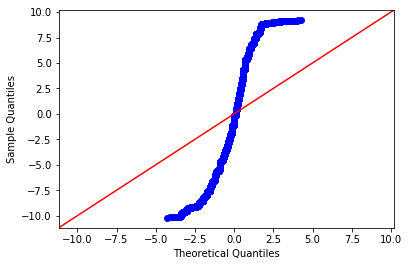

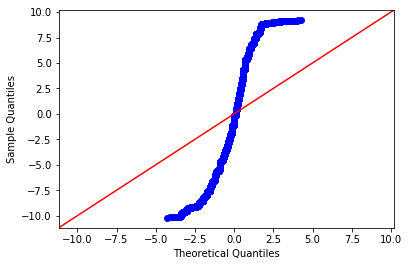

In [304]:
res = model4.resid
sm.qqplot(res, line='45')

In [ ]:
plt.hist(y)